# Study Output Data

## Load libraries

In [78]:
import pandas as pd
import pprint
import logging
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pp = pprint.PrettyPrinter(indent=2)

logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
    datefmt="%Y-%m-%d %H:%M:%S",
)

## Load data

In [79]:
df = pd.read_pickle("../../data/output/timeseries_2010_2024_1_complete.pkl")
df = df.astype({"election_type": "category"})

## Basic Information and Summary Statistics

The dataset contains several columns with percentages related to electoral data, demographic information for the year 2021, mean income, and some indices.

In [80]:
# Basic information about the dataset
df_info = df.info()
df_info

<class 'pandas.core.frame.DataFrame'>
Index: 60996 entries, A20101_08001801001 to G20192_43907601004
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   cens_electoral_percentage_CS          60996 non-null  float64 
 1   cens_electoral_percentage_CUP         60996 non-null  float64 
 2   cens_electoral_percentage_ECPGUANYEM  60996 non-null  float64 
 3   cens_electoral_percentage_ERC         60996 non-null  float64 
 4   cens_electoral_percentage_JXCATJUNTS  60996 non-null  float64 
 5   cens_electoral_percentage_OTH         60996 non-null  float64 
 6   cens_electoral_percentage_PP          60996 non-null  float64 
 7   cens_electoral_percentage_PSC         60996 non-null  float64 
 8   cens_electoral_percentage_VOX         60996 non-null  float64 
 9   2021_born_abroad                      60996 non-null  float64 
 10  2021_adult                            60996 n

In [81]:
# Summary statistics
summary_stats = df.describe()
summary_stats

,cens_electoral_percentage_CS,cens_electoral_percentage_CUP,cens_electoral_percentage_ECPGUANYEM,cens_electoral_percentage_ERC,cens_electoral_percentage_JXCATJUNTS,cens_electoral_percentage_OTH,cens_electoral_percentage_PP,cens_electoral_percentage_PSC,cens_electoral_percentage_VOX,2021_born_abroad,2021_adult,2021_child,2021_senior,2021_young,2021_mean_income,2020_ist
count,60996.000000,60996.000000,60996.000000,60996.000000,60996.000000,60996.000000,60996.000000,60996.000000,60996.000000,60996.000000,60996.000000,60996.000000,60996.000000,60996.000000,60996.0,60876.000000
mean,6.427090,1.966402,7.706802,11.017201,15.983260,0.339338,6.054348,11.722716,1.016884,0.194757,0.439637,0.142026,0.200895,0.217442,38066.447374,99.999566
std,6.472983,2.858832,5.648950,7.883102,12.568381,0.291986,4.290496,6.402639,1.855076,0.112697,0.031039,0.033042,0.056155,0.033683,10127.682791,16.665492
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.324747,0.000000,0.025932,0.065217,0.0,32.100000
25%,2.035085,0.000000,3.584229,4.653319,6.092596,0.124416,2.930334,6.946454,0.000000,0.111181,0.420145,0.120342,0.163158,0.198614,31472.0,89.900000
50%,4.534012,0.000000,6.144325,10.326087,13.147264,0.273673,5.103668,10.948905,0.000000,0.172533,0.438719,0.140709,0.197891,0.215219,36206.0,101.900000
75%,8.762967,3.258743,10.303723,16.240526,23.000540,0.475647,8.229386,15.658106,1.413947,0.254094,0.458716,0.161847,0.235103,0.234112,41961.0,111.700000
max,48.623853,41.414141,37.240356,54.761905,88.421053,8.046243,42.345679,43.606557,18.913858,0.838191,0.640000,0.313311,0.431818,0.460636,88769.0,140.300000


In [82]:
# Rename the columns
# Replace CDC for Junts
# Replace OTH for Altres
# Replace CS for C's
# Replace ECPGUANYEM for Comuns
replacements = {
    "CDC": "Junts",
    "OTH": "Altres",
    "CS": "C's",
    "ECPGUANYEM": "Comuns",
    "JXCATJUNTS": "Junts",
}
df.columns = df.columns.str.replace(
    "CDC|OTH|CS|ECPGUANYEM|JXCATJUNTS", lambda m: replacements[m.group(0)], regex=True
)

In [83]:
df["electionid"] = df.index.str.split("_").str[0]
df["mundissec"] = df.index.str.split("_").str[1]

In [84]:
# Find columns that contain "cens_electoral_percentage"
percentage_columns = [col for col in df.columns if "cens_electoral_percentage" in col]

# Dictionary to store the number of empty rows for each column
empty_rows_by_column = {}

# Loop through each relevant column and calculate the number of empty rows by electionid
for col in percentage_columns:
    empty_rows = (
        df[df[col] == 0.0]
        .groupby("electionid")[col]
        .size()
    )
    empty_rows_by_column[col] = empty_rows

# Convert dictionary of Series to DataFrame
empty_rows_df = pd.DataFrame(empty_rows_by_column).fillna(0).astype(int)
empty_rows_df

,cens_electoral_percentage_C's,cens_electoral_percentage_CUP,cens_electoral_percentage_Comuns,cens_electoral_percentage_ERC,cens_electoral_percentage_Junts,cens_electoral_percentage_Altres,cens_electoral_percentage_PP,cens_electoral_percentage_PSC,cens_electoral_percentage_VOX
electionid,,,,,,,,,
A20101,399,5083,223,206,196,197,217,203,5083
A20121,270,188,182,161,160,169,181,195,5083
A20151,91,67,98,5083,66,83,89,104,5083
A20171,73,69,95,65,65,306,109,75,5083
A20211,98,13,49,0,2,131,105,6,71
E20141,261,5083,93,79,79,110,115,130,2200
E20191,75,5083,67,30,28,74,91,33,232
G20111,5083,5083,200,193,186,199,190,187,5083
G20151,94,5083,68,67,74,96,81,84,4967


In [85]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

cens_electoral_percentage_C's         0
cens_electoral_percentage_CUP         0
cens_electoral_percentage_Comuns      0
cens_electoral_percentage_ERC         0
cens_electoral_percentage_Junts       0
cens_electoral_percentage_Altres      0
cens_electoral_percentage_PP          0
cens_electoral_percentage_PSC         0
cens_electoral_percentage_VOX         0
2021_born_abroad                      0
2021_adult                            0
2021_child                            0
2021_senior                           0
2021_young                            0
2021_mean_income                      0
2020_ist                            120
election_type                         0
electionid                            0
mundissec                             0
dtype: int64

In [86]:
# check missing values of 2020_ist on only one electionid
df[(df["electionid"] == "A20211") & (df["2020_ist"].isnull())].info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, A20211_08040301009 to A20211_17169301003
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   cens_electoral_percentage_C's     10 non-null     float64 
 1   cens_electoral_percentage_CUP     10 non-null     float64 
 2   cens_electoral_percentage_Comuns  10 non-null     float64 
 3   cens_electoral_percentage_ERC     10 non-null     float64 
 4   cens_electoral_percentage_Junts   10 non-null     float64 
 5   cens_electoral_percentage_Altres  10 non-null     float64 
 6   cens_electoral_percentage_PP      10 non-null     float64 
 7   cens_electoral_percentage_PSC     10 non-null     float64 
 8   cens_electoral_percentage_VOX     10 non-null     float64 
 9   2021_born_abroad                  10 non-null     float64 
 10  2021_adult                        10 non-null     float64 
 11  2021_child                      

- The dataset contains 60,996 rows and 17 columns.
- There are no missing values in most columns except for ``2020_ist``, which has 120 missing values. It has empty data for only 10 census sections.
- The dataset primarily consists of float values, except for ``electionid_mundissec`` (object) and ``election_type`` (integer).


- ``2021_mean_income`` ranges from 0 to 88,769, with a mean of 38,066 and a standard deviation of 10,128.
- ``2020_ist`` has a mean close to 100, indicating it might be an index normalized around 100.
- The other columns represent various percentages, with values ranging from 0 to approximately 25.

## Correlation Analysis and Visualizations

Next, let's create some visualizations to better understand the data distribution and correlations:

- Histograms for numerical columns to visualize the distribution.
- Correlation Heatmap to understand the relationships between different features.

In [87]:
# Map for renaming the variables
variables_map = {
    "cens_electoral_percentage_Junts": "Junts % vot sobre el cens",
    "cens_electoral_percentage_C's": "C's % vot sobre el cens",
    "cens_electoral_percentage_CUP": "CUP % vot sobre el cens",
    "cens_electoral_percentage_Comuns": "Comuns % vot sobre el cens",
    "cens_electoral_percentage_ERC": "ERC % vot sobre el cens",
    "cens_electoral_percentage_Altres": "Altres % vot sobre el cens",
    "cens_electoral_percentage_PP": "PP % vot sobre el cens",
    "cens_electoral_percentage_PSC": "PSC % vot sobre el cens",
    "cens_electoral_percentage_VOX": "VOX % vot sobre el cens",
    "2021_born_abroad": "Proporció de nascuts a l'estranger",
    "2021_adult": "Proporció d'adults",
    "2021_child": "Proporció de nens",
    "2021_senior": "Proporció de gent gran",
    "2021_young": "Proporció de joves",
    "2021_mean_income": "Renda mitjana",
    "2020_ist": "IST",
    "election_type": "Tipus d'elecció",
}

# Rename the columns using the variables_map
df.rename(columns=variables_map, inplace=True)

C:\Users\guill\AppData\Local\Temp\ipykernel_19300\755090582.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


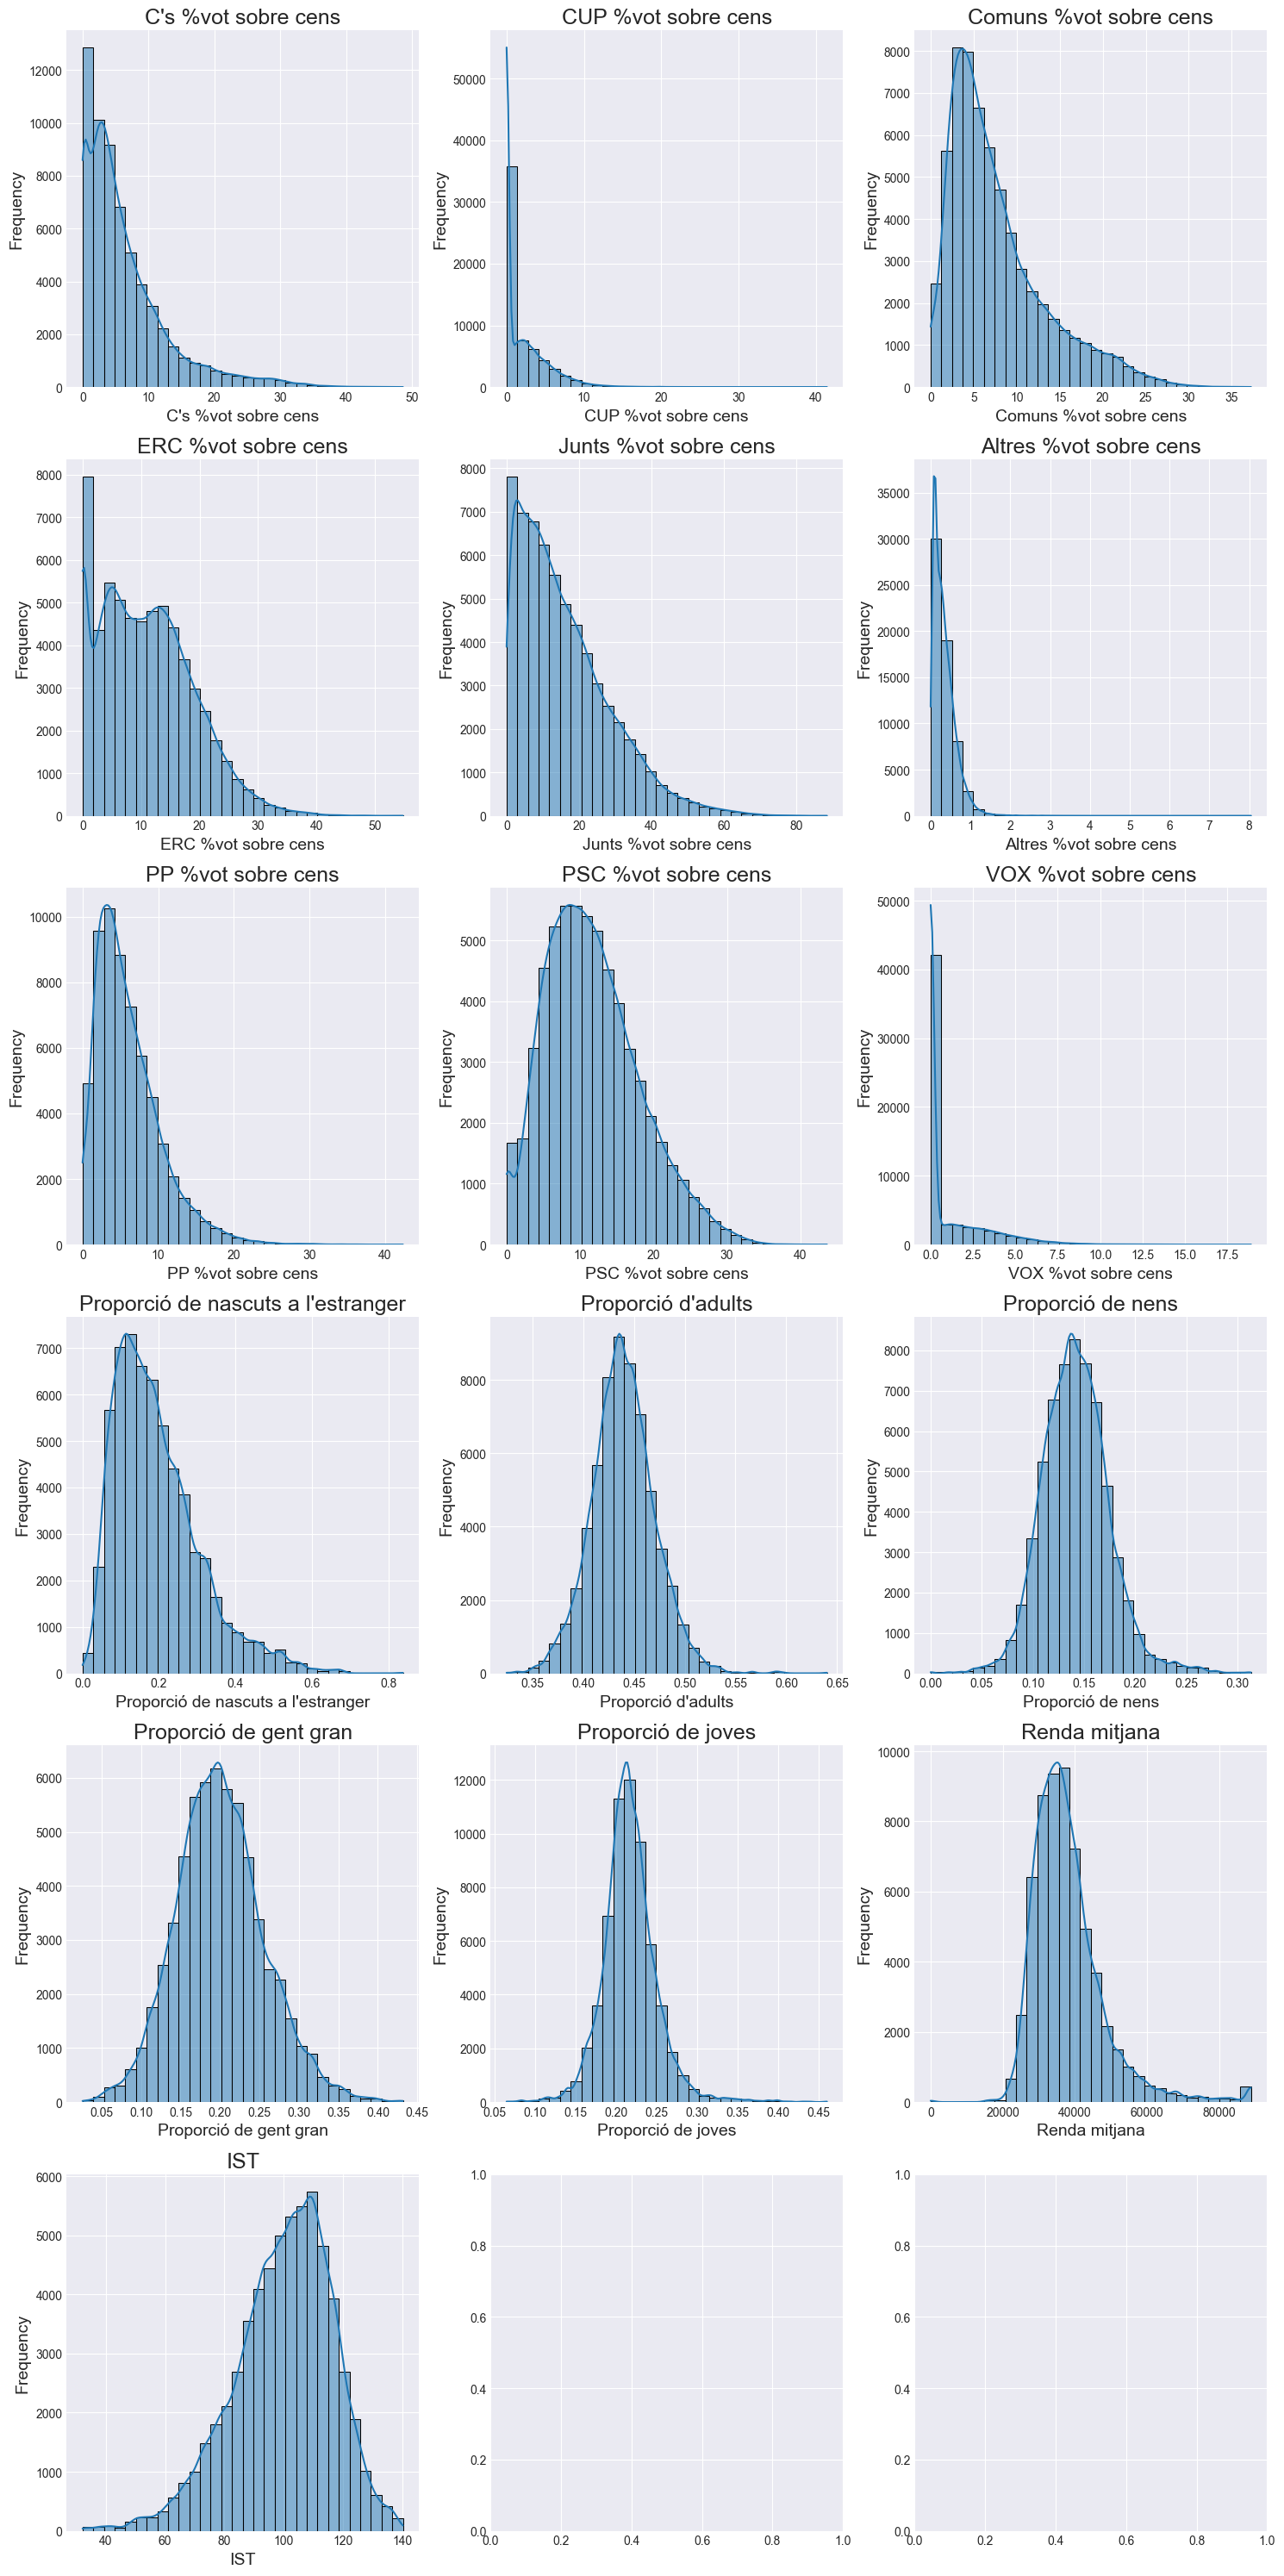

In [88]:
# Set up the plotting configuration
plt.style.use("seaborn-darkgrid")

# Plot histograms for selected numerical columns
numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns
numerical_columns_df = df[numerical_columns]

# Create histograms
num_cols = len(numerical_columns)
num_rows = (num_cols + 2) // 3  # Adjust the number of rows

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))  # Adjust the figsize
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(col, fontsize=18)  # Increase title font size
    axes[i // 3, i % 3].set_xlabel(col, fontsize=14)  # Increase x-axis label font size
    axes[i // 3, i % 3].set_ylabel('Frequency', fontsize=14)  # Increase y-axis label font size

plt.tight_layout()
plt.show()

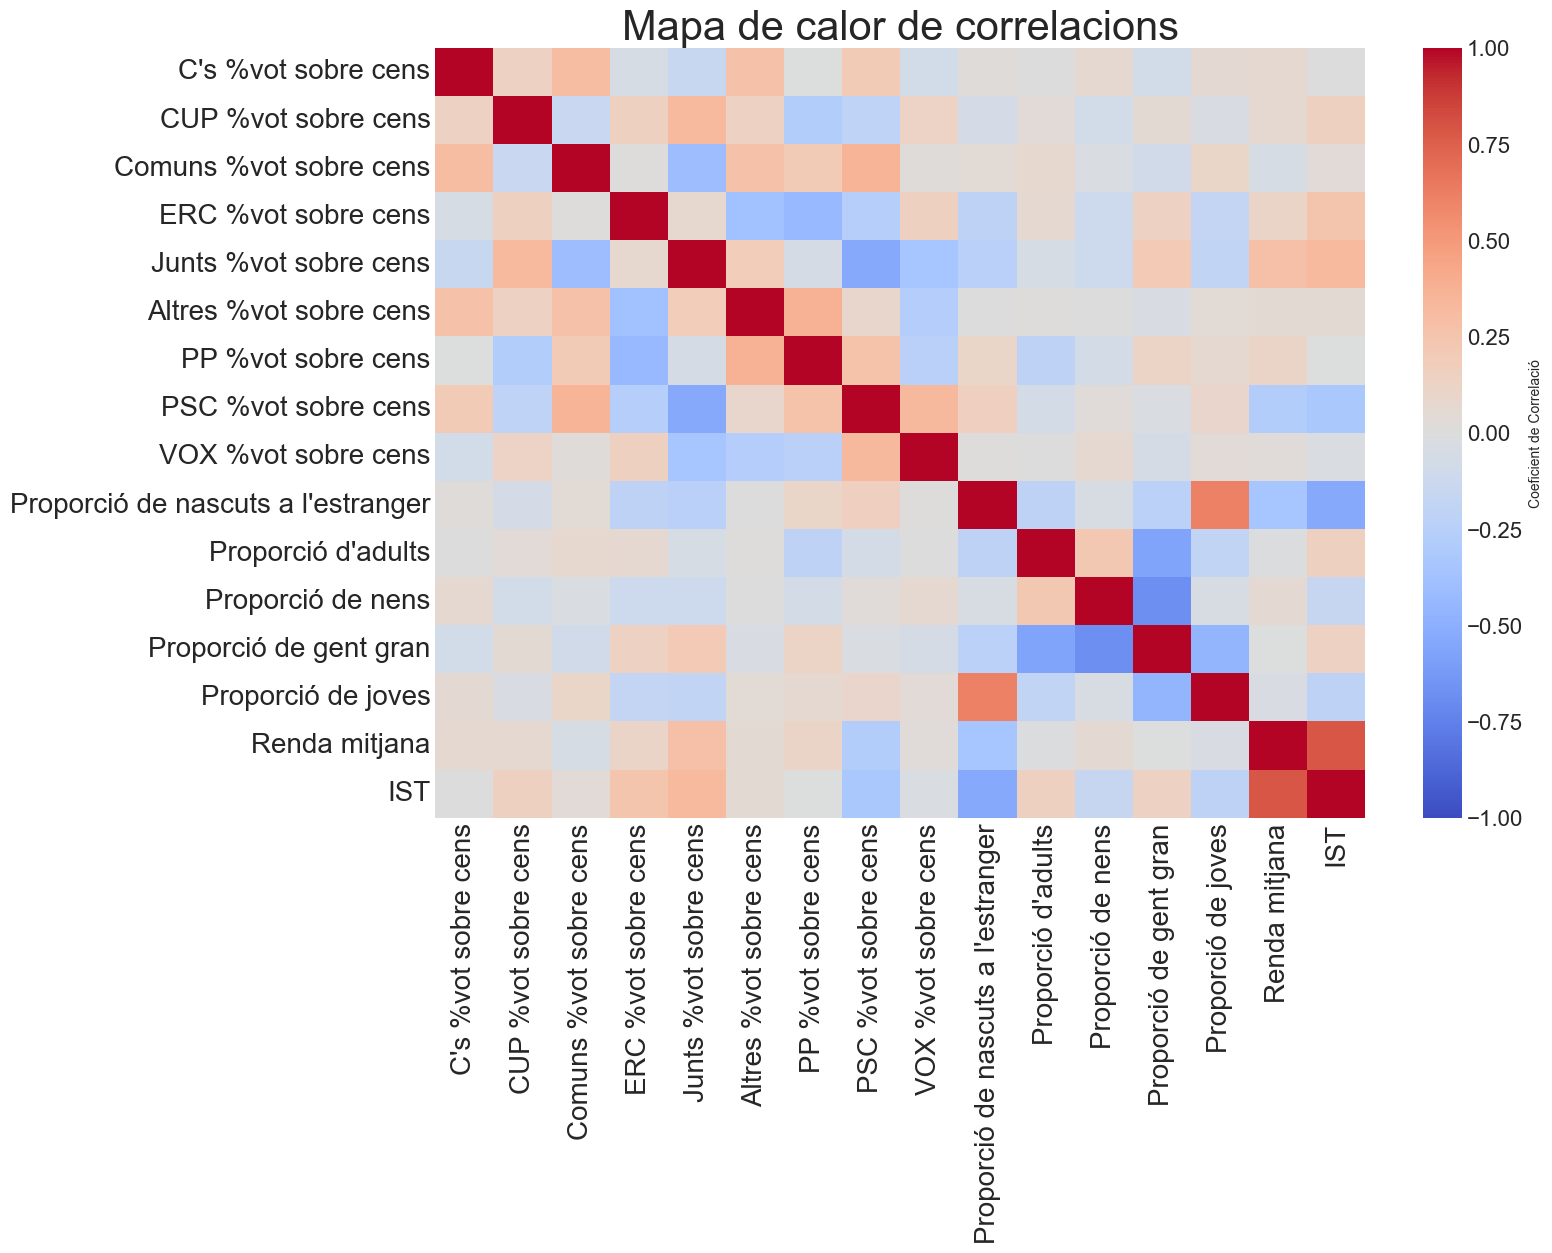

In [89]:
# Correlation heatmap
correlation_matrix = numerical_columns_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(
    correlation_matrix,
    annot=False,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    cbar_kws={"label": "Coeficient de Correlació"},
)
plt.title("Mapa de calor de correlacions", fontsize=30)  # Increase title font size
plt.xticks(fontsize=20)  # Increase x-axis tick labels font size
plt.yticks(fontsize=20)  # Increase y-axis tick labels font size

# To increase the colorbar tick labels font size
cbar = plt.gca().collections[0].colorbar
cbar.ax.tick_params(labelsize=16)

plt.show()

### Key Insights from Visualizations

1. **Histograms**:
   - Most percentage columns have skewed distributions, often towards zero.
   - ``2021_mean_income`` and ``2020_ist`` exhibit more varied distributions, with ``2021_mean_income`` showing a relatively normal distribution centered around 38,000, and ``2020_ist`` centered around 100.

2. **Correlation Heatmap**:
   - There are noticeable correlations among certain percentage columns.
   - ``2020_ist`` shows some correlation with several columns, indicating potential relationships worth further investigation.
   - Other strong correlations can be identified between related demographic percentages (e.g., ``2021_p_child`` and ``2021_p_adult``).